<a href="https://colab.research.google.com/github/fdeabreu/Python_Data_Analytics_Course/blob/main/Linear_Regression_EPL_xG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice: Linear Regression Arsenal EPL xG

# Outline
[ 1 - Packages ](#1)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Refresher on linear regression](#2.3)
  - [ 2.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Learning parameters using batch gradient descent ](#2.6)





| Date | Opponent | Result | **GF** (Goals For) | GA (Goals Against) | **xG** | xGA (Expected Goals Against) | Poss (%) |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 2025-08-17 | Manchester Utd | W 1–0 | **1** | 0 | **1.3** | 1.5 | 39 |
| 2025-08-23 | Leeds United | W 5–0 | **5** | 0 | **2.7** | 0.2 | 67 |
| 2025-08-31 | Liverpool | L 0–1 | **0** | 1 | **0.5** | 0.5 | 47 |
| 2025-09-13 | Nott'ham Forest | W 3–0 | **3** | 0 | **1.8** | 0.2 | 54 |
| 2025-09-21 | Manchester City | D 1–1 | **1** | 1 | **0.9** | 0.9 | 66 |
| 2025-09-28 | Newcastle Utd | W 2–1 | **2** | 1 | **2.0** | 0.6 | 63 |
| 2025-10-04 | West Ham | W 2–0 | **2** | 0 | **2.8** | 0.4 | 67 |
| 2025-10-18 | Fulham | W 1–0 | **1** | 0 | **1.8** | 0.4 | 63 |
| 2025-10-26 | Crystal Palace | W 1–0 | **1** | 0 | **0.9** | 0.5 | 59 |
| 2025-11-01 | Burnley | W 2–0 | **2** | 0 | **2.3** | 0.4 | 54 |
| 2025-11-08 | Sunderland | D 2–2 | **2** | 2 | **1.9** | 0.4 | 64 |
| 2025-11-23 | Tottenham | W 4–1 | **4** | 1 | **1.9** | 0.1 | 57 |

<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Develop a simple linear regression model to quantify the relationship between Arsenal's Expected Goals (xG) and their Actual Goals scored, thereby determining the optimal parameters (w and b) that minimize the prediction error.

## 3 - Dataset

You will start by loading the dataset for this task.
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [5]:
# load the dataset

# Input Feature (x): Expected Goals (xG) for each match
xG_data = np.array([1.3, 2.7, 0.5, 1.8, 0.9, 2.0, 2.8, 1.8, 0.9, 2.3, 1.9, 1.9])

# Target Variable (y): Actual Goals (GF) for each match
Goals_data = np.array([1, 5, 0, 3, 1, 2, 2, 1, 1, 2, 2, 4])

In [7]:
# print xG_data
print("Type of xG_data:",type(xG_data))
print("All 12 elements of xG_data are:\n", xG_data[:12])

Type of xG_data: <class 'numpy.ndarray'>
All 12 elements of xG_data are:
 [1.3 2.7 0.5 1.8 0.9 2.  2.8 1.8 0.9 2.3 1.9 1.9]


In [8]:
# print Goals_data
print("Type of Goals_data:",type(Goals_data))
print("All 12 elements of Goals_data are:\n", Goals_data[:12])

Type of Goals_data: <class 'numpy.ndarray'>
All 12 elements of Goals_data are:
 [1 5 0 3 1 2 2 1 1 2 2 4]


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

In [9]:
print ('The shape of xG_data is:', xG_data.shape)
print ('The shape of Goals_data is: ', Goals_data.shape)
print ('Number of training examples (m):', len(xG_data))

The shape of xG_data is: (12,)
The shape of Goals_data is:  (12,)
Number of training examples (m): 12


#### Visualize your data

It is often useful to understand the data by visualizing it.

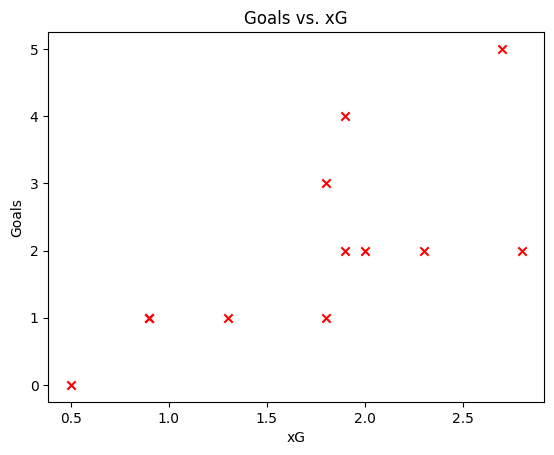

In [10]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(xG_data, Goals_data, marker='x', c='r')

# Set the title
plt.title("Goals vs. xG")
# Set the y-axis label
plt.ylabel('Goals')
# Set the x-axis label
plt.xlabel('xG')
plt.show()

The goal is to build a linear regression model to fit this data.


<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**.
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated.
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

In [12]:
#FUNCTION: compute_cost

def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (xG)
        y (ndarray): Shape (m,) Label (Goals)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    ### START CODE HERE ###
    # variable keeping track of sum  cost from each example
    cost_sum = 0

    # Loop over training examples

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])** 2
        cost_sum = cost_sum + cost

    total_cost = (1 / (2 * m)) * cost_sum
    ### END CODE HERE ###

    return total_cost

In [14]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(xG_data, Goals_data, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 3.597


<a name="6"></a>
## 6 - Gradient descent

In this section, you will implement the gradient for parameters $w, b$ for linear regression.

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [15]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (xG of Arsenal)
      y (ndarray): Shape (m,) Label (Actual Goals for the Arsenal)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]

    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    dj_dw_sum = 0
    dj_db_sum = 0

    ### START CODE HERE ###

    for i in range(m):
        f_wb = w * x[i] + b
        err = f_wb - y[i]
        dj_db_i = err
        dj_dw_i = err * x[i]
        dj_db_sum += dj_db_i
        dj_dw_sum += dj_dw_i

    dj_db = dj_db_sum / m
    dj_dw = dj_dw_sum / m


    ### END CODE HERE ###

    return dj_dw, dj_db

Run the cells below to check your implementation of the compute_gradient function with two different initializations of the parameters  𝑤 , 𝑏 .

In [21]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(xG_data, Goals_data, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -4.116666666666666 -2.0


In [23]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(xG_data, Goals_data, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -3.0753333333333335 -1.4533333333333331


<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [24]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(x)

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [26]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(xG_data ,Goals_data, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     2.71   
Iteration  150: Cost     0.50   
Iteration  300: Cost     0.49   
Iteration  450: Cost     0.49   
Iteration  600: Cost     0.48   
Iteration  750: Cost     0.48   
Iteration  900: Cost     0.47   
Iteration 1050: Cost     0.47   
Iteration 1200: Cost     0.47   
Iteration 1350: Cost     0.47   
w,b found by gradient descent: 1.295566198526003 -0.22673446714546114


We will now use the final parameters from gradient descent to plot the linear fit.

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$.

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [29]:
m = xG_data.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * xG_data[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'xG')

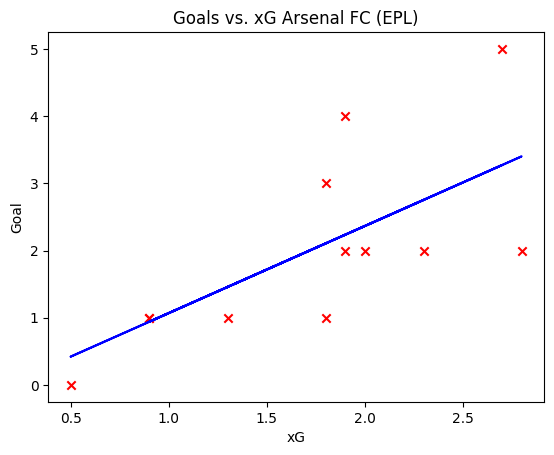

In [31]:
# Plot the linear fit
plt.plot(xG_data, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(xG_data,Goals_data, marker='x', c='r')

# Set the title
plt.title("Goals vs. xG Arsenal FC (EPL)")
# Set the y-axis label
plt.ylabel('Goal')
# Set the x-axis label
plt.xlabel('xG')

In [34]:
predict1 = 0.9 * w + b
print('For xG = 0.9, we predict Goals %.2f' % (predict1))

For xG = 0.9, we predict Goals 0.94
